# Cluster Implementation Scrypt

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from textblob import TextBlob

import sys
sys.path.append('.')
from functions.csv_cleaning import load_in, remove_links, remove_nan, clean_data
from functions.clustering import tf_idf, append_sent_and_subj, punctuation, inertia_plot, cluster_model, rank_years

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/thefleok/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df_raw = load_in()
df_basic = clean_data(df_raw)
df_basic.head()

,Song Title,Artist,Lyrics,Year,Rank,Word Counts,Unique Word Counts
0,The Battle Of New Orleans,Johnny Horton,In 1814 we took a little trip Along with Colo...,1959.0,1,435,155
1,Mack The Knife,Bobby Darin,"Oh the shark, babe Has such teeth, dear And he...",1959.0,2,224,145
2,Personality,Lloyd Price,Over and over I tried to prove my love to you ...,1959.0,3,215,55
3,Venus,Frankie Avalon,"Hey, Venus! Oh, Venus! Venus, if you will Ple...",1959.0,4,166,74
4,Lonely Boy,Paul Anka,I'm just a lonely boy Lonely and blue I'm all ...,1959.0,5,140,68


# TF-IDF Implementation

In [3]:
tfidf_df = tf_idf(df_basic, 10).copy()
tfidf_df.head(1)

,baby,don,got,just,know,let,like,love,want,yeah
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Sentiment / Subjectivity Implementation

In [4]:
sent_and_subj_df = append_sent_and_subj(df_basic)
sent_and_subj_df.head()

,Song Title,Artist,Lyrics,Year,Rank,Word Counts,Unique Word Counts,sentiment,subjectivity
0,The Battle Of New Orleans,Johnny Horton,In 1814 we took a little trip Along with Colo...,1959.0,1,435,155,0.066681,0.391962
1,Mack The Knife,Bobby Darin,"Oh the shark, babe Has such teeth, dear And he...",1959.0,2,224,145,-0.008757,0.219392
2,Personality,Lloyd Price,Over and over I tried to prove my love to you ...,1959.0,3,215,55,0.433333,0.436111
3,Venus,Frankie Avalon,"Hey, Venus! Oh, Venus! Venus, if you will Ple...",1959.0,4,166,74,0.374312,0.614620
4,Lonely Boy,Paul Anka,I'm just a lonely boy Lonely and blue I'm all ...,1959.0,5,140,68,0.141667,0.537745


# Punctuation

In [5]:
punctuation_df = punctuation(sent_and_subj_df)
punctuation_df.head()

,Song Title,Artist,Lyrics,Year,Rank,Word Counts,Unique Word Counts,sentiment,subjectivity,question_count,exclamation_count
0,The Battle Of New Orleans,Johnny Horton,In 1814 we took a little trip Along with Colo...,1959.0,1,435,155,0.066681,0.391962,0,0
1,Mack The Knife,Bobby Darin,"Oh the shark, babe Has such teeth, dear And he...",1959.0,2,224,145,-0.008757,0.219392,3,2
2,Personality,Lloyd Price,Over and over I tried to prove my love to you ...,1959.0,3,215,55,0.433333,0.436111,0,0
3,Venus,Frankie Avalon,"Hey, Venus! Oh, Venus! Venus, if you will Ple...",1959.0,4,166,74,0.374312,0.614620,0,4
4,Lonely Boy,Paul Anka,I'm just a lonely boy Lonely and blue I'm all ...,1959.0,5,140,68,0.141667,0.537745,0,0


# Aggregation

In [6]:
cluster_df = pd.concat([tfidf_df, punctuation_df[['sentiment', 'subjectivity', 'Year', 'Word Counts', 'Unique Word Counts','Rank', 'question_count','exclamation_count']]], axis=1).dropna()
cluster_df.head()

,baby,don,got,just,know,let,like,love,want,yeah,sentiment,subjectivity,Year,Word Counts,Unique Word Counts,Rank,question_count,exclamation_count
0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.066681,0.391962,1959.0,435.0,155.0,1.0,0.0,0.0
1,0.0,0.179567,0.000000,0.900227,0.349594,0.0,0.187430,0.000000,0.000000,0.0,-0.008757,0.219392,1959.0,224.0,145.0,2.0,3.0,2.0
2,0.0,0.000000,0.807469,0.000000,0.000000,0.0,0.000000,0.589910,0.000000,0.0,0.433333,0.436111,1959.0,215.0,55.0,3.0,0.0,0.0
3,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.374312,0.614620,1959.0,166.0,74.0,4.0,0.0,4.0
4,0.0,0.000000,0.429223,0.493295,0.000000,0.0,0.256764,0.627151,0.336424,0.0,0.141667,0.537745,1959.0,140.0,68.0,5.0,0.0,0.0


In [7]:
X = cluster_df.copy()

# scale our data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# check that scaling worked (mean = 0, std = 1)
print(X_scaled.mean())
print(X_scaled.std())

1.5511937413571609e-16
1.0


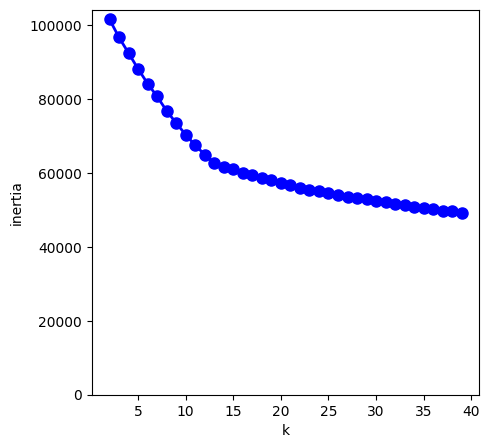

In [9]:
inertia_plot(X_scaled)

In [10]:
fit_df = cluster_model(cluster_df, X_scaled, 13)
fit_df.head()

,baby,don,got,just,know,let,like,love,want,yeah,sentiment,subjectivity,Year,Word Counts,Unique Word Counts,Rank,question_count,exclamation_count,k_cluster
0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.066681,0.391962,1959.0,435.0,155.0,1.0,0.0,0.0,12
1,0.0,0.179567,0.000000,0.900227,0.349594,0.0,0.187430,0.000000,0.000000,0.0,-0.008757,0.219392,1959.0,224.0,145.0,2.0,3.0,2.0,9
2,0.0,0.000000,0.807469,0.000000,0.000000,0.0,0.000000,0.589910,0.000000,0.0,0.433333,0.436111,1959.0,215.0,55.0,3.0,0.0,0.0,1
3,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.374312,0.614620,1959.0,166.0,74.0,4.0,0.0,4.0,0
4,0.0,0.000000,0.429223,0.493295,0.000000,0.0,0.256764,0.627151,0.336424,0.0,0.141667,0.537745,1959.0,140.0,68.0,5.0,0.0,0.0,0


In [11]:
rank_years(fit_df)

Max year: 2023.0
Min year: 1959.0
k_cluster
0     1979.726596
9     1984.877470
4     1986.020000
1     1989.790323
3     1990.593117
6     1990.868217
11    1991.613636
10    1992.609914
8     1995.730159
12    1995.914634
2     2000.425926
5     2000.862847
7     2005.993658
Name: Year, dtype: float64
